# Preliminary exploratory data analysis
This Jupyter notebook will demostrate that the dataset can be read into R and present the data in a tidy format.

## Introduction
It is without a doubt that tennis is a very popular sport all around the world. There are several huge tournaments that occur yearly such as Wimbledon, US Open, and Australian Open. In the data set that we are working with today, it shows the statistics of the top 500 tennis players around the world. We want to analyze and tidy this data set from the original set so there’s a clear and concise set of data to use for our project. In our data set we need to tidy the set by highest rank, so number one comes out first and then second and so on. We want to see what percentage of players who are right handed versus the players who are left handed and where they fall on their rankings.

## Setup

In [168]:
library(tidyverse)
library(repr)
library(stringr)
options(repr.matrix.max.rows = 6)
library(digest)
library(tidymodels)
library(GGally)
library(ISLR)

## Data Reading

In [169]:
raw_data <- read_csv("player_stats.csv")
raw_data

Warning message:
“Missing column names filled in: 'X1' [1]”
Parsed with column specification:
cols(
  .default = col_character(),
  X1 = col_double(),
  `Turned Pro` = col_double(),
  Seasons = col_double(),
  Titles = col_double(),
  `Best Season` = col_double(),
  Retired = col_double(),
  Masters = col_double(),
  `Grand Slams` = col_double(),
  `Davis Cups` = col_double(),
  `Team Cups` = col_double(),
  Olympics = col_double(),
  `Weeks at No. 1` = col_double(),
  `Tour Finals` = col_double()
)

See spec(...) for full column specifications.



X1,Age,Country,Plays,Wikipedia,Current Rank,Best Rank,Name,Backhand,Prize Money,⋯,Facebook,Twitter,Nicknames,Grand Slams,Davis Cups,Web Site,Team Cups,Olympics,Weeks at No. 1,Tour Finals
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
0,26 (25-04-1993),Brazil,Right-handed,Wikipedia,378 (97),363 (04-11-2019),Oscar Jose Gutierrez,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1,18 (22-12-2001),United Kingdom,Left-handed,Wikipedia,326 (119),316 (14-10-2019),Jack Draper,Two-handed,"$59,040",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,32 (03-11-1987),Slovakia,Right-handed,Wikipedia,178 (280),44 (14-01-2013),Lukas Lacko,Two-handed,"US$3,261,567",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
497,23 (14-03-1996),Netherlands,Left-handed,Wikipedia,495 (60),342 (05-08-2019),Gijs Brouwer,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
498,24 (17-05-1995),Ukraine,NA,Wikipedia,419 (81),419 (20-01-2020),Vladyslav Orlov,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
499,22 (26-03-1997),Tunisia,Left-handed,Wikipedia,451 (69),408 (24-12-2018),Aziz Dougaz,Two-handed,"$61,984",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


## Data Wrangling
First, because we want to predict the price money of players, so we delete all irrelevant columns like Country, Name, Favorite Surface.
Plus, we delete Rafael Madal(whose current rank is 1) beacuse his price money is tremendously larger than other players(10 times larger than the player just behind him).
Second, we use mutate function to remove unuseful characters and signals in Height, Current Rank, Price Money columns etc.
Thirdly, we use mutae and replace_na functions to set all NAs(indicate the player doesn't have any titles) in Title columns into 0.
Fourth, we use mutate and ifelse functions to set factor columns Backhand and Plays into 1 and 0s because we may use them as predictors subsequently.
Fifth, we use mutate and str_remove functions to remove all the useless information in columns like Current Rank, Peak Elo Rating, Age, Height.
Six, we use arrange function to rank the players in the dataset acording to their current rank.

In [170]:
set.seed(2000)
tidy_data <- raw_data %>%
             select(Age:'Titles') %>%
             select(-Wikipedia, -'Best Rank', -Country, -Name, -'Favorite Surface', -'Last Appearance') %>%
             mutate(Titles = replace_na(Titles, 0)) %>%
             mutate(Plays = as.integer(ifelse(Plays == "Right-handed",1,0))) %>%
             mutate(Backhand = as.integer(ifelse(Backhand == "Two-handed",1,0))) %>%
             mutate(`Current Rank` = as.integer(str_remove(string = raw_data$`Current Rank`, pattern = "\\(.*\\)"))) %>%
             mutate(`Best Elo Rank` = as.integer(str_remove(string = raw_data$`Best Elo Rank`, pattern = "\\(.*\\)"))) %>%
             mutate(`Best Rank` = as.integer(str_remove(string = raw_data$`Best Rank`, pattern = "\\(.*\\)"))) %>%
             mutate(`Current Elo Rank` = as.integer(str_remove(string = raw_data$`Current Elo Rank`, pattern = "\\(.*\\)"))) %>%
             mutate(`Best Elo Rank` = as.integer(str_remove(string = raw_data$`Best Elo Rank`, pattern = "\\(.*\\)"))) %>%
             mutate(`Peak Elo Rating` = as.integer(str_remove(string = raw_data$`Peak Elo Rating`, pattern = "\\(.*\\)"))) %>%
             mutate(`Prize Money` = as.integer(str_remove_all(string = raw_data$`Prize Money`, pattern = "[a-zA-Z]|\\$|\\,"))) %>%
             mutate(Age = as.integer(str_sub(Age, 1, 2))) %>%
             mutate('Height(cm)' = as.integer(str_sub(Height, 1, 3))) %>%
             select(-Height) %>%
             filter(`Prize Money` != "NA", Seasons != "NA", `Turned Pro` != "NA", `Best Elo Rank` != "NA", `Peak Elo Rating` != "NA"
                    ,`Current Elo Rank` != "NA" ,`Best Rank` != "NA", `Current Rank` != "NA", Plays != "NA", Backhand != "NA") %>%
             arrange(`Current Rank`) %>%
             filter(`Current Rank` != 1)
tidy_data

Warning message:
“Problem with `mutate()` input `Prize Money`.
ℹ NAs introduced by coercion
ℹ Input `Prize Money` is `as.integer(str_remove_all(string = raw_data$`Prize Money`, pattern = "[a-zA-Z]|\\$|\\,"))`.”
Warning message in mask$eval_all_mutate(dots[[i]]):
“NAs introduced by coercion”


Age,Plays,Current Rank,Backhand,Prize Money,Turned Pro,Seasons,Active,Current Elo Rank,Best Elo Rank,Peak Elo Rating,Titles,Best Rank,Height(cm)
<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<chr>,<int>,<int>,<int>,<dbl>,<int>,<int>
23,1,4,1,10507693,2014,5,Yes,5,4,2243,7,4,NA
21,1,6,0,10425605,2016,4,Yes,8,8,2175,4,5,NA
23,1,8,1,3580862,2015,3,Yes,17,13,2102,3,8,NA
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
26,1,324,1,132871,2009,8,Yes,180,179,1679,0,249,NA
29,1,358,1,627102,2012,12,Yes,118,96,1825,0,139,NA
32,1,361,1,2013618,2006,11,Yes,166,89,1836,0,68,175


## Pick Predictors
Here, we create plots for each potential numerical predictors to demonstrate their relationships with price money.

Warning message:
“Removed 74 rows containing missing values (geom_point).”


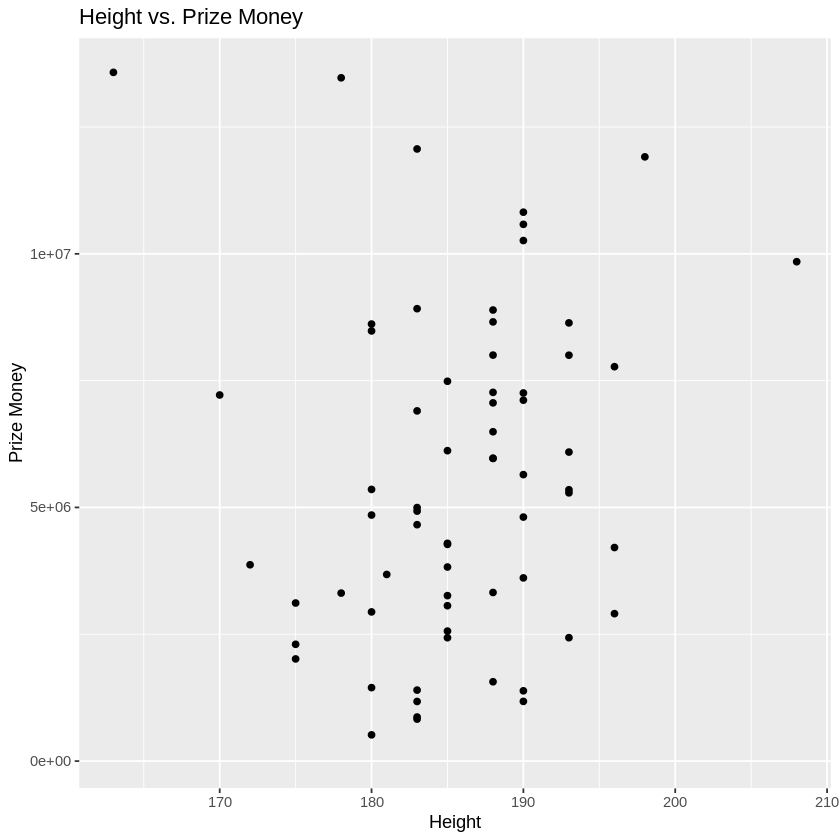

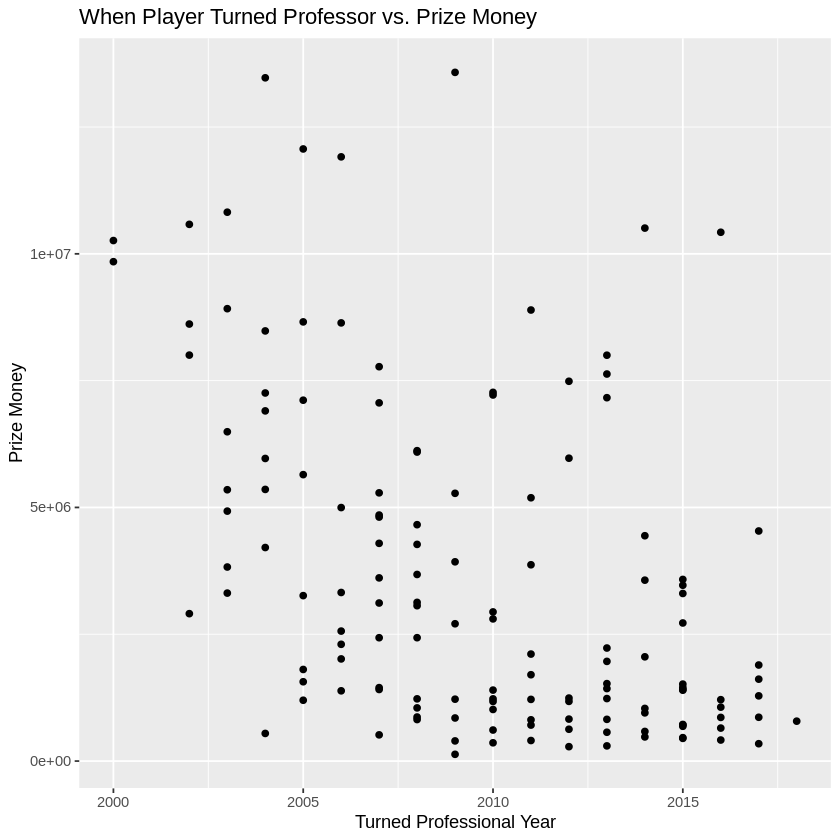

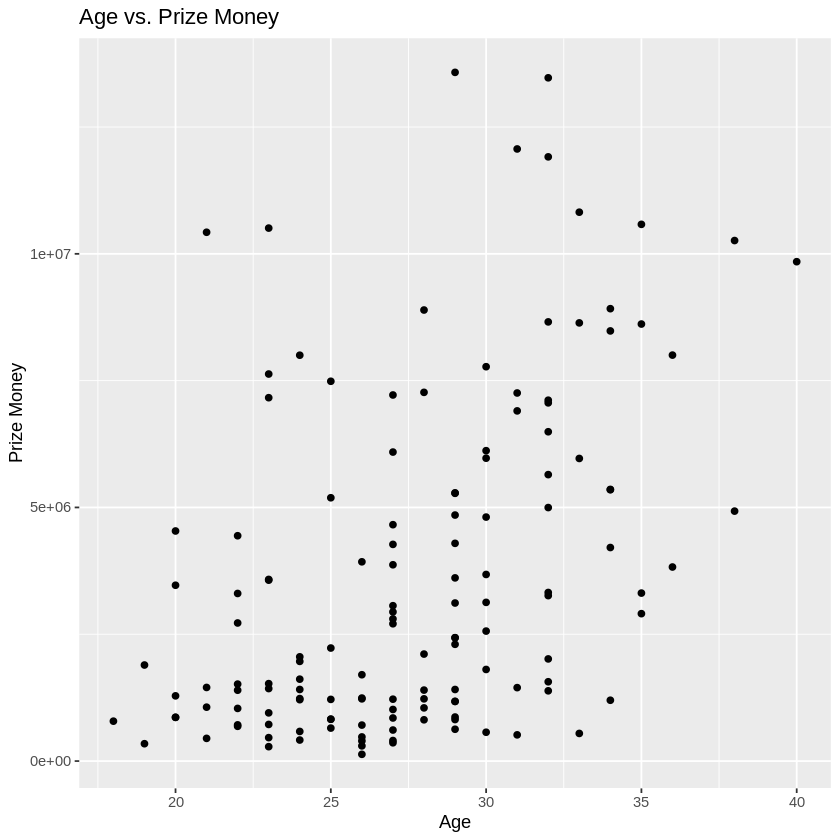

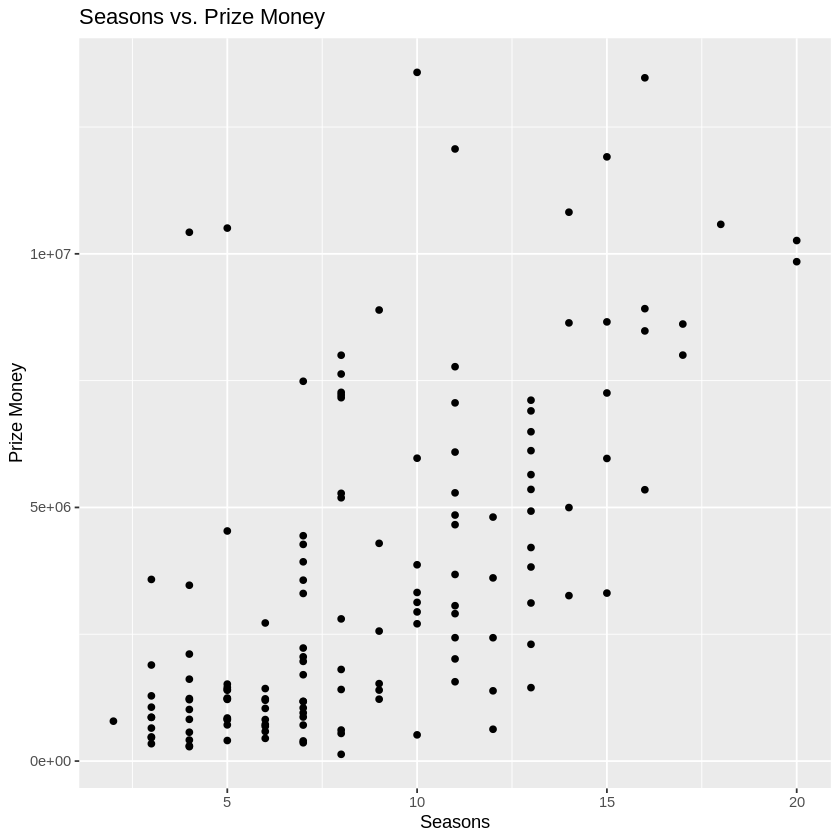

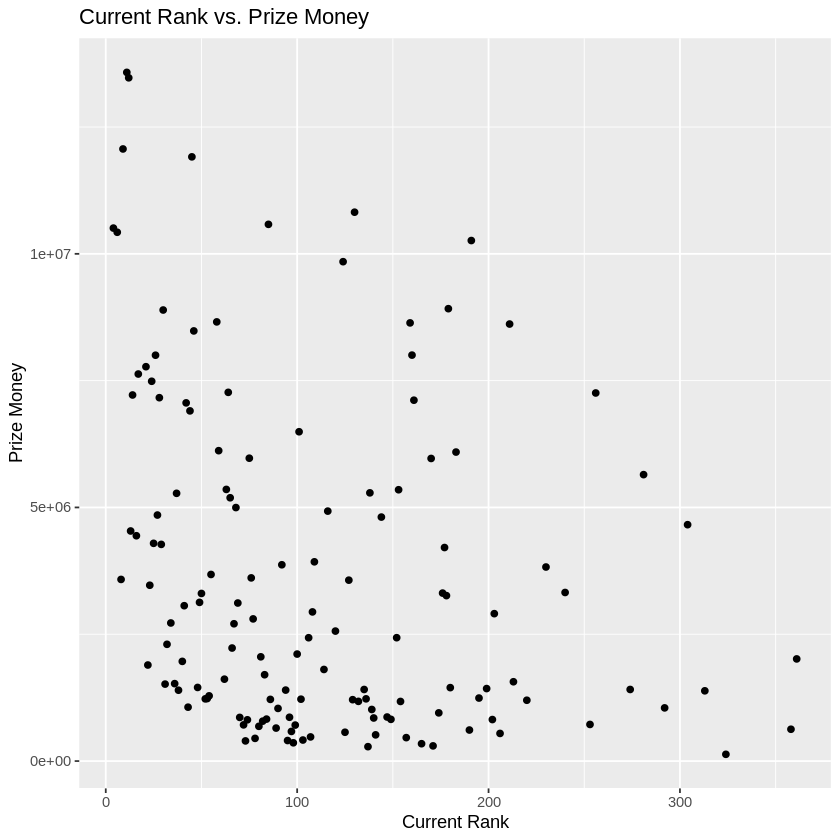

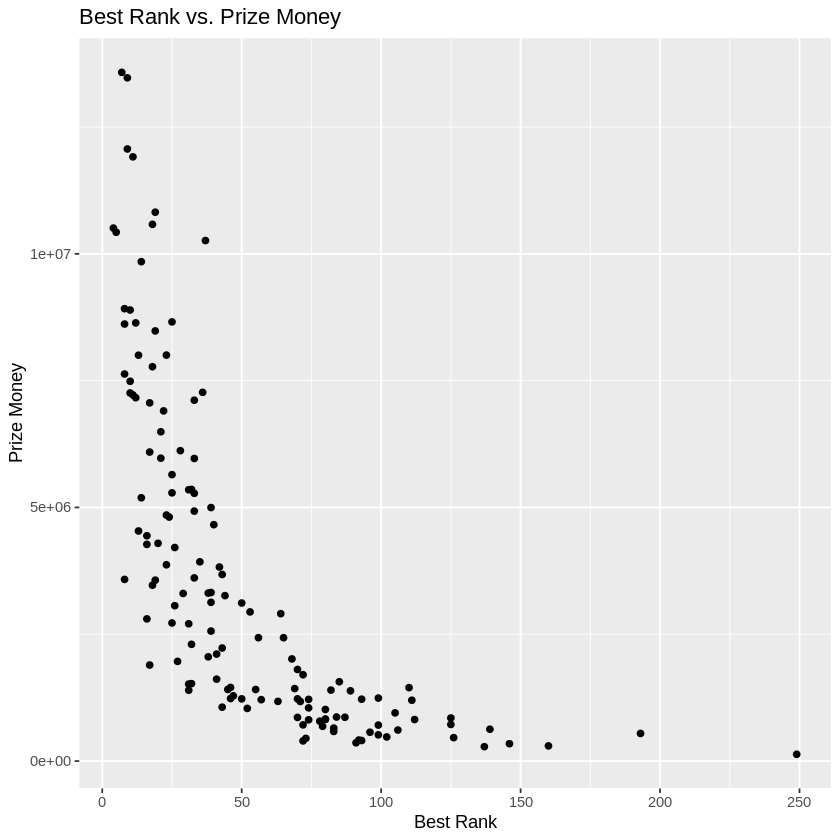

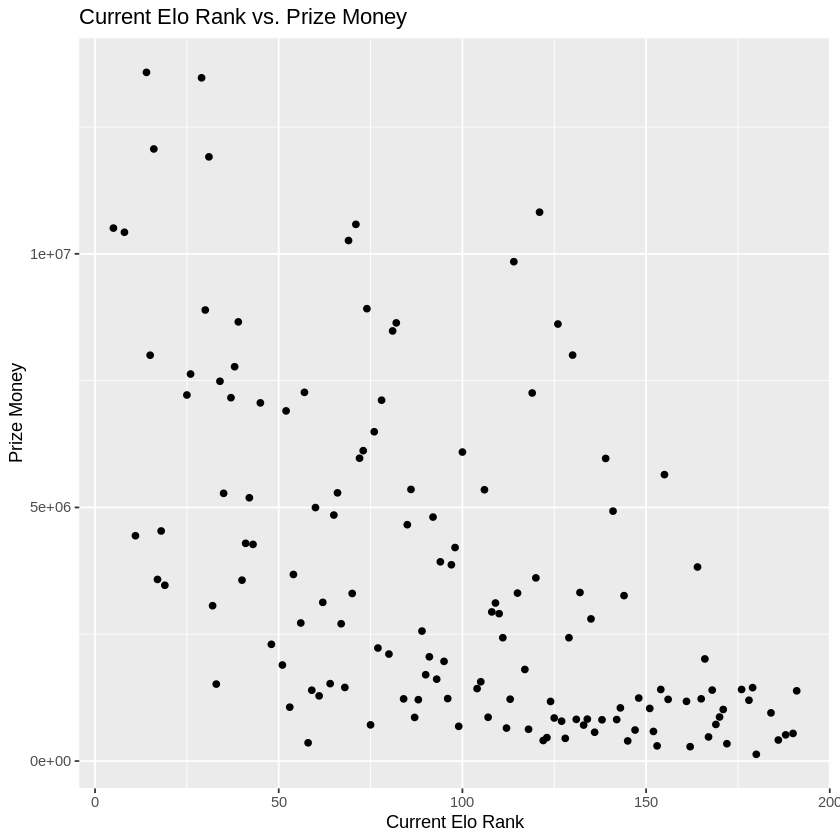

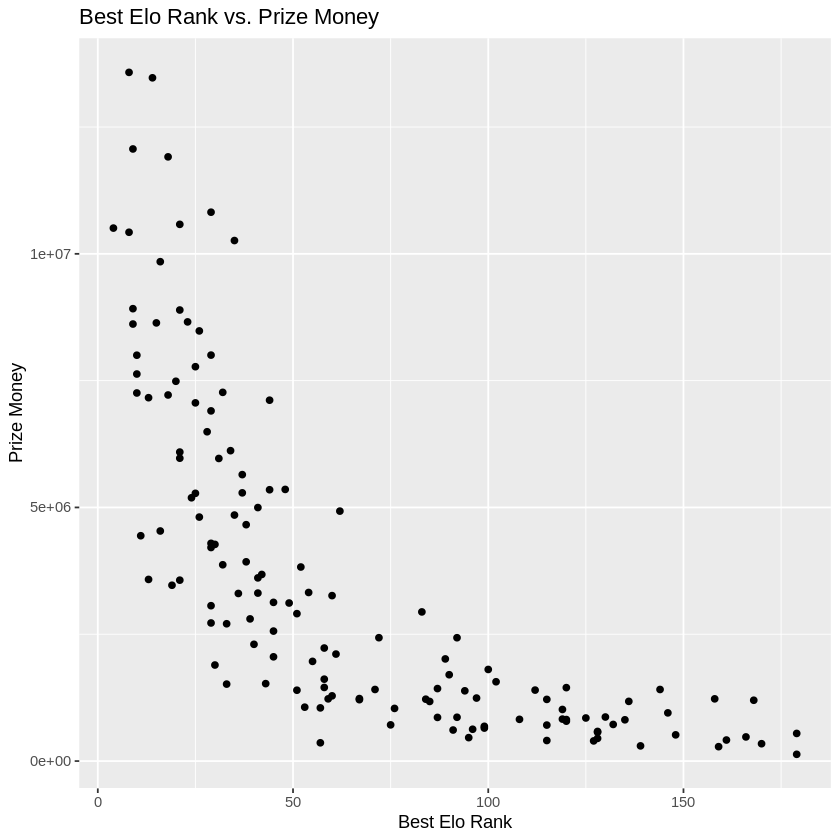

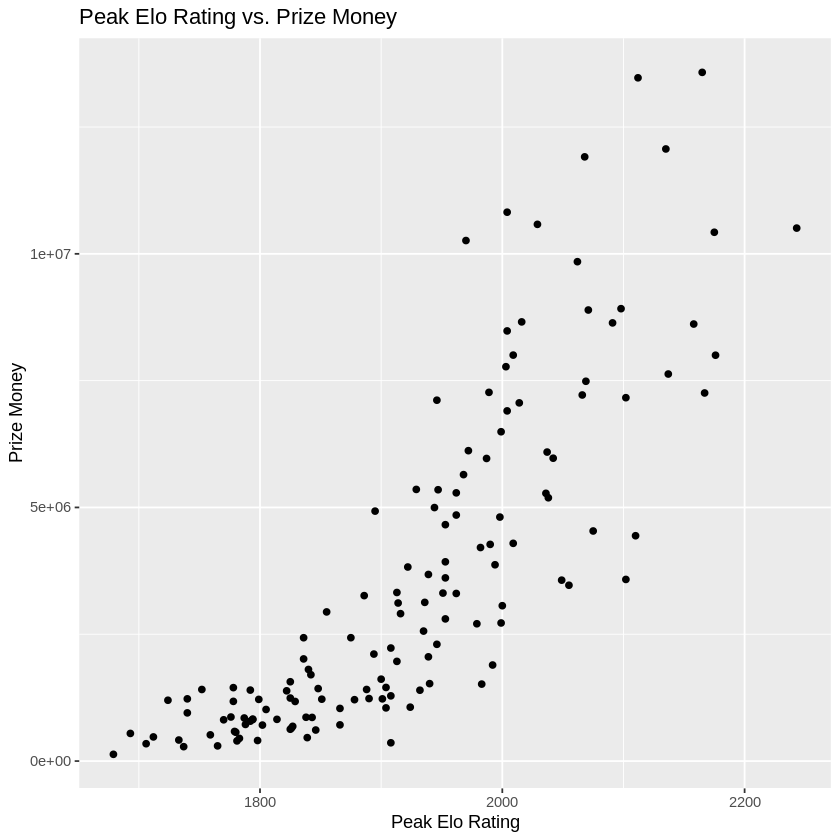

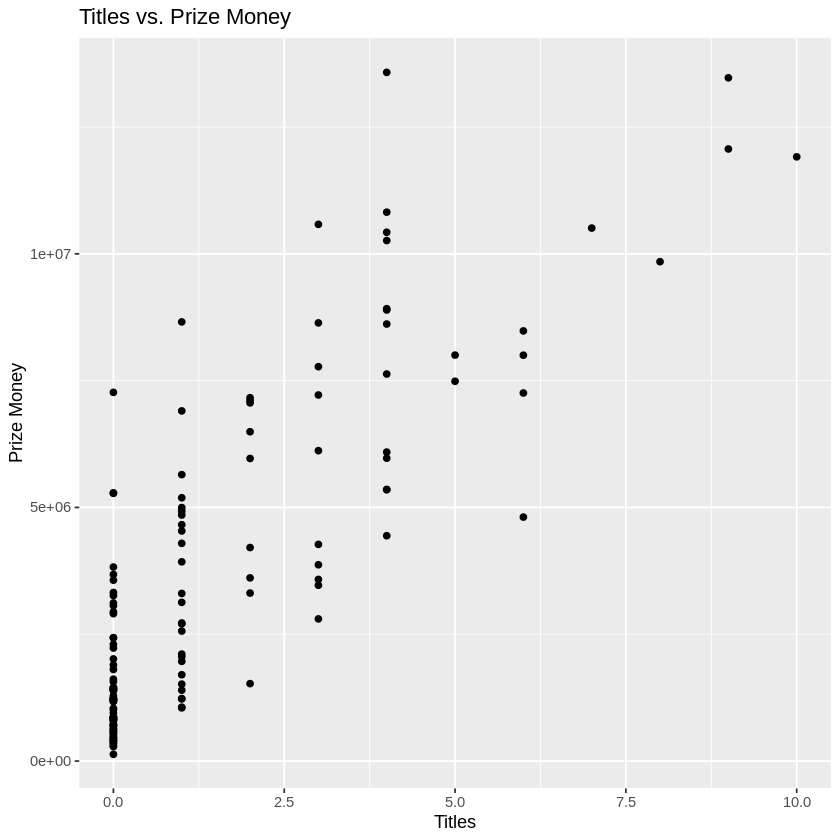

In [171]:
height_momeny_plot <- tidy_data %>%
    ggplot(aes(x = `Height(cm)`, y = `Prize Money`)) + 
        geom_point() + 
        labs(x = "Height", y = "Prize Money") +
        ggtitle("Height vs. Prize Money")
height_momeny_plot
turnPro_momeny_plot <- tidy_data %>%
    ggplot(aes(x = `Turned Pro`, y = `Prize Money`)) + 
        geom_point() + 
        labs(x = "Turned Professional Year", y = "Prize Money") +
        ggtitle("When Player Turned Professor vs. Prize Money")
turnPro_momeny_plot
age_momeny_plot <- tidy_data %>%
    ggplot(aes(x = Age, y = `Prize Money`)) + 
        geom_point() + 
        labs(x = "Age", y = "Prize Money") +
        ggtitle("Age vs. Prize Money")
age_momeny_plot
season_momeny_plot <- tidy_data %>%
    ggplot(aes(x = `Seasons`, y = `Prize Money`)) + 
        geom_point() + 
        labs(x = "Seasons", y = "Prize Money") +
        ggtitle("Seasons vs. Prize Money")
season_momeny_plot
rank_momeny_plot1 <- tidy_data %>%
    ggplot(aes(x = `Current Rank`, y = `Prize Money`)) + 
        geom_point() + 
        labs(x = "Current Rank", y = "Prize Money") +
        ggtitle("Current Rank vs. Prize Money")
rank_momeny_plot1
rank_momeny_plot2 <- tidy_data %>%
    ggplot(aes(x = `Best Rank`, y = `Prize Money`)) + 
        geom_point() + 
        labs(x = "Best Rank", y = "Prize Money") +
        ggtitle("Best Rank vs. Prize Money")
rank_momeny_plot2
rank_momeny_plot3 <- tidy_data %>%
    ggplot(aes(x = `Current Elo Rank`, y = `Prize Money`)) + 
        geom_point() + 
        labs(x = "Current Elo Rank", y = "Prize Money") +
        ggtitle("Current Elo Rank vs. Prize Money")
rank_momeny_plot3
rank_momeny_plot4 <- tidy_data %>%
    ggplot(aes(x = `Best Elo Rank`, y = `Prize Money`)) + 
        geom_point() + 
        labs(x = "Best Elo Rank", y = "Prize Money") +
        ggtitle("Best Elo Rank vs. Prize Money")
rank_momeny_plot4
rating_momeny_plot <- tidy_data %>%
    ggplot(aes(x = `Peak Elo Rating`, y = `Prize Money`)) + 
        geom_point() + 
        labs(x = "Peak Elo Rating", y = "Prize Money") +
        ggtitle("Peak Elo Rating vs. Prize Money")
rating_momeny_plot
titles_momeny_plot <- tidy_data %>%
    ggplot(aes(x = `Titles`, y = `Prize Money`)) + 
        geom_point() + 
        labs(x = "Titles", y = "Prize Money") +
        ggtitle("Titles vs. Prize Money")
titles_momeny_plot

Seen from plots above, we find: 
* (1) height barely have any relationships with price money.
* (2) Turn Pro, Current Rank, Current Elo Rank have weak negative relationships with price money.
* (3) Best Rank, Best Elo Rank have strong negative relationships with price money.
* (4) Age, Titles have weak possitve relationships with price money.
* (5) Seaons, Peak Elo Rating have strong possitve relationships with price money.

As a result, we decide to choose all numerical columns accept height. Furthermore, we decide to use linear regression as model first because it is better at predicting linear relationships.

## Remove all the NA in the dataset and split the data:

In [172]:
set.seed(2000)
tidy_data <- tidy_data %>%
          filter(`Prize Money` != "NA", Seasons != "NA", `Turned Pro` != "NA", `Best Elo Rank` != "NA", `Peak Elo Rating` != "NA"
                    ,`Current Elo Rank` != "NA" ,`Best Rank` != "NA", `Current Rank` != "NA", Plays != "NA", Backhand != "NA")
data_split <- initial_split(tidy_data, prop = 0.6, strata = `Prize Money`)
data_training <- training(data_split)
data_testing <- testing(data_split)
data_training

Age,Plays,Current Rank,Backhand,Prize Money,Turned Pro,Seasons,Active,Current Elo Rank,Best Elo Rank,Peak Elo Rating,Titles,Best Rank,Height(cm)
<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<chr>,<int>,<int>,<int>,<dbl>,<int>,<int>
31,1,9,1,12067808,2005,11,Yes,16,9,2135,9,9,183
29,1,11,1,13578010,2009,10,Yes,14,8,2165,4,7,163
32,1,12,1,13470614,2004,16,Yes,29,14,2112,9,9,178
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
24,0,274,1,1411268,2015,5,Yes,154,71,1888,0,45,NA
27,1,304,1,4660132,2008,11,Yes,85,38,1953,1,40,183
32,1,361,1,2013618,2006,11,Yes,166,89,1836,0,68,175


## Predict the price money using Linear regression:

In [173]:

lm_spec <- linear_reg() %>% 
      set_engine("lm") %>%
      set_mode("regression")
lm_data_recipe <-  recipe(`Prize Money` ~ Plays + Backhand + `Turned Pro` + Age + `Current Rank` + `Seasons` + `Best Elo Rank` + 
                       `Peak Elo Rating` + `Current Elo Rank` + `Best Rank` + Titles, data = data_training)
lm_data_fit <- workflow() %>%
      add_recipe(lm_data_recipe) %>%
      add_model(lm_spec) %>%
      fit(data = data_training)
lm_data_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
       (Intercept)               Plays            Backhand        `Turned Pro`  
        -9.989e+07          -3.993e+05           6.794e+05           2.465e+04  
               Age      `Current Rank`             Seasons     `Best Elo Rank`  
         1.090e+05           5.174e+02           2.485e+05           4.927e+04  
 `Peak Elo Rating`  `Current Elo Rank`         `Best Rank`              Titles  
         2.448e+04          -1.827e+04          -6.679e+03           4.179e+05  


### So the mathematical equations for the linear regression prediction model is:
$Price\: Money = -(9.989e+07) - (3.993e+05)*Plays + (6.794e+05)*Backhand + (2.465e+04)*Turned\: Pro + (1.090e+05)*Age  + (5.174e+02)*Current\: Rank + (2.485e+05)*Seasons + (4.927e+04)*Best\: Elo\: Rank + (2.448e+04)*Peak\: Elo\: Rating - (1.827e+04)*Current\: Elo\: Rank - (6.679e+03)*Best\: Rank + (4.179e+05)*Titles$

## Compute RMSE and RMSPE of Linear regression

In [174]:
lm_rmse <- lm_data_fit %>%
        predict(data_training) %>%
        bind_cols(data_training) %>%
        metrics(truth = `Prize Money`, estimate = .pred) %>%
        filter(.metric == "rmse") %>%
        select(.estimate) %>%
        pull()
lm_rmse

[1] 1083658

In [175]:
lm_rmspe <- lm_data_fit %>%
        predict(data_testing) %>%
        bind_cols(data_testing) %>%
        metrics(truth = `Prize Money`, estimate = .pred) %>%
        filter(.metric == "rmse") %>%
        select(.estimate) %>%
        pull()
lm_rmspe

[1] 1318061

RMSE of linear regression is 1083657, RMSPE is 1318061, which is a little larger than RMSE. So the predict model is vaild.

## Predict the price money using Knn regression and compute its RMSPE:

Choose the best number of neighbors for the knn regression:

In [176]:
set.seed(2000)
data_recipe_scaled <- data_recipe %>%
                  step_scale(all_predictors()) %>%
                  step_center(all_predictors())
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
                  set_engine("kknn") %>%
                  set_mode("regression")
data_fold <- vfold_cv(data_training, v = 5, strata = `Prize Money`)
gridvals <- tibble(neighbors = seq(1,50))
data_workflow <- workflow() %>%
                 add_recipe(data_recipe_scaled) %>%
                 add_model(knn_spec)
result <- data_workflow %>%
                       tune_grid(resamples = data_fold, grid = gridvals) %>%
                       collect_metrics() %>%
                       filter(.metric == 'rmse') %>%
                       filter(mean == min(mean)) %>%
                       select(n) %>%
                       pull()
result

[1] 5

### Use the result k = 5 for the model and compute the RMSE as well as RMSPE:

In [177]:
set.seed(2000)
knn_data_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = result) %>%
                  set_engine("kknn") %>%
                  set_mode("regression")
knn_data_fit <- workflow() %>%
           add_recipe(data_recipe_scaled) %>%
           add_model(knn_data_spec) %>%
           fit(data = data_training)
rmse_data_summary <- knn_data_fit %>% 
           predict(data_training) %>%
           bind_cols(data_training) %>%
           metrics(truth = `Prize Money`, estimate = .pred)
knn_rmse <- rmse_data_summary %>%
            filter(.metric == 'rmse') %>%
            select(.estimate) %>%
            pull()
rmspe_data_summary <- knn_data_fit %>% 
           predict(data_testing) %>%
           bind_cols(data_testing) %>%
           metrics(truth = `Prize Money`, estimate = .pred)
knn_rmspe <- rmspe_data_summary %>%
            filter(.metric == 'rmse') %>%
            select(.estimate) %>%
            pull()
knn_rmse
knn_rmspe

[1] 1286583

[1] 1320740

The RMSE of knn-regression is 1286583, RMSPE is 1320740, which is also a little larger than RMSE. So the predict model is also vaild.

## Visualize the prediction

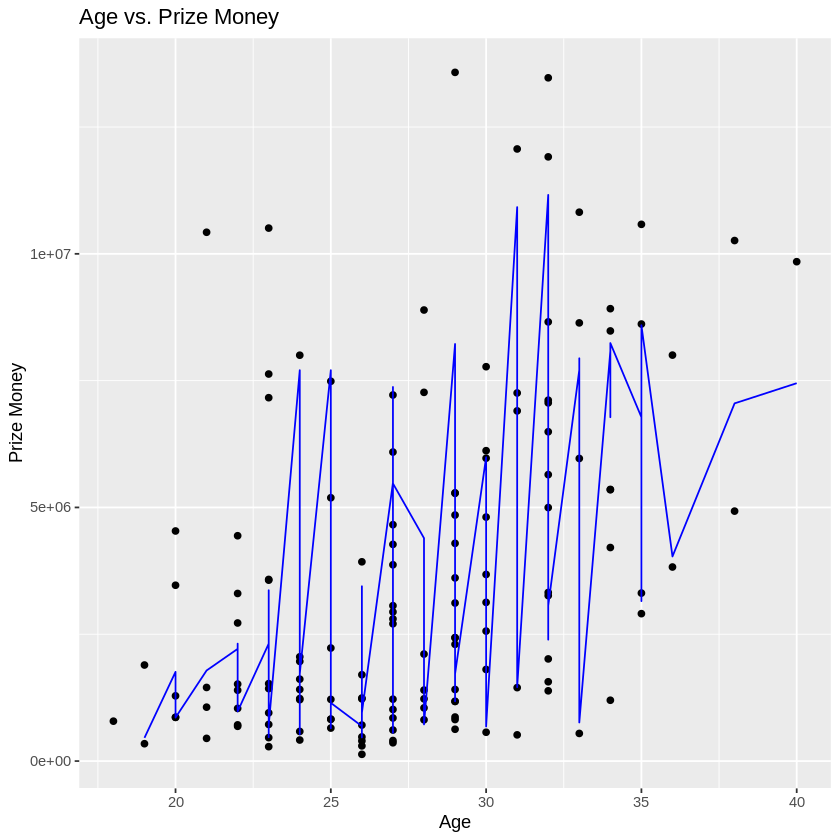

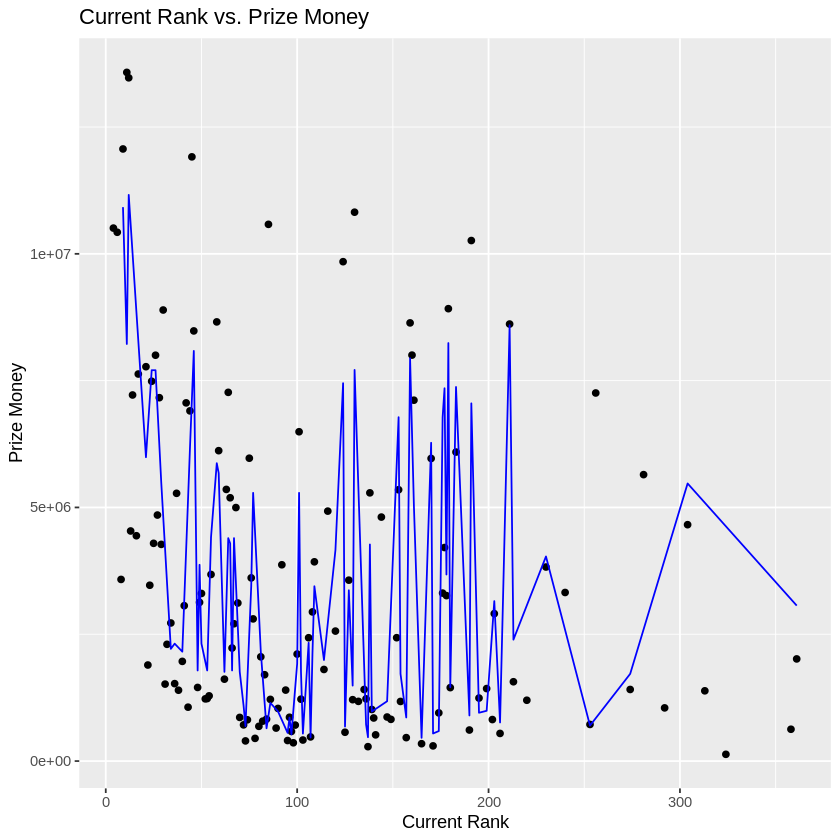

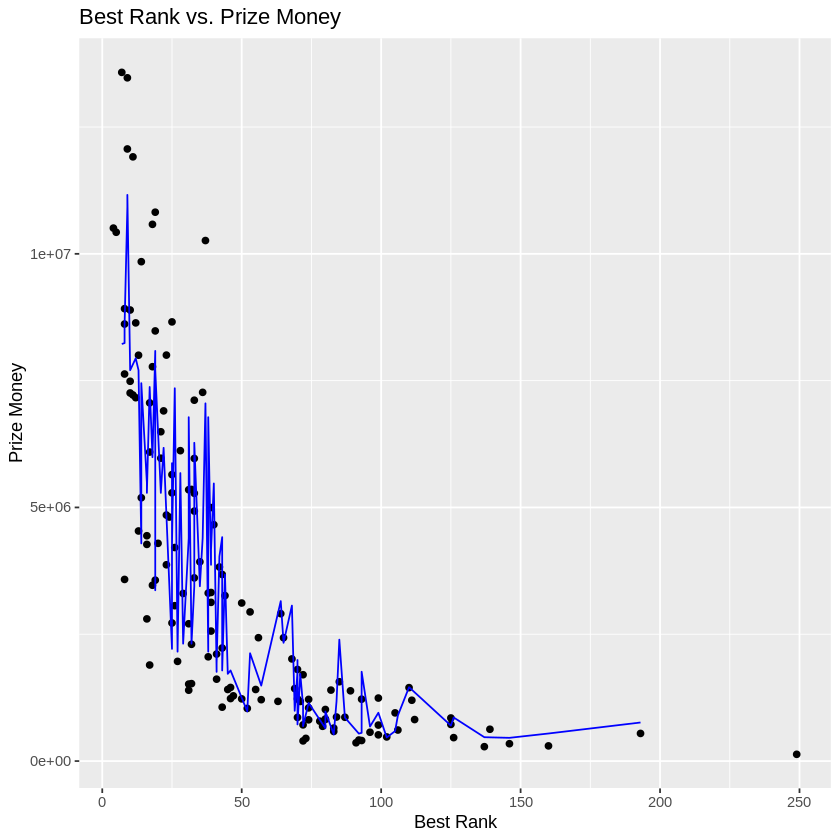

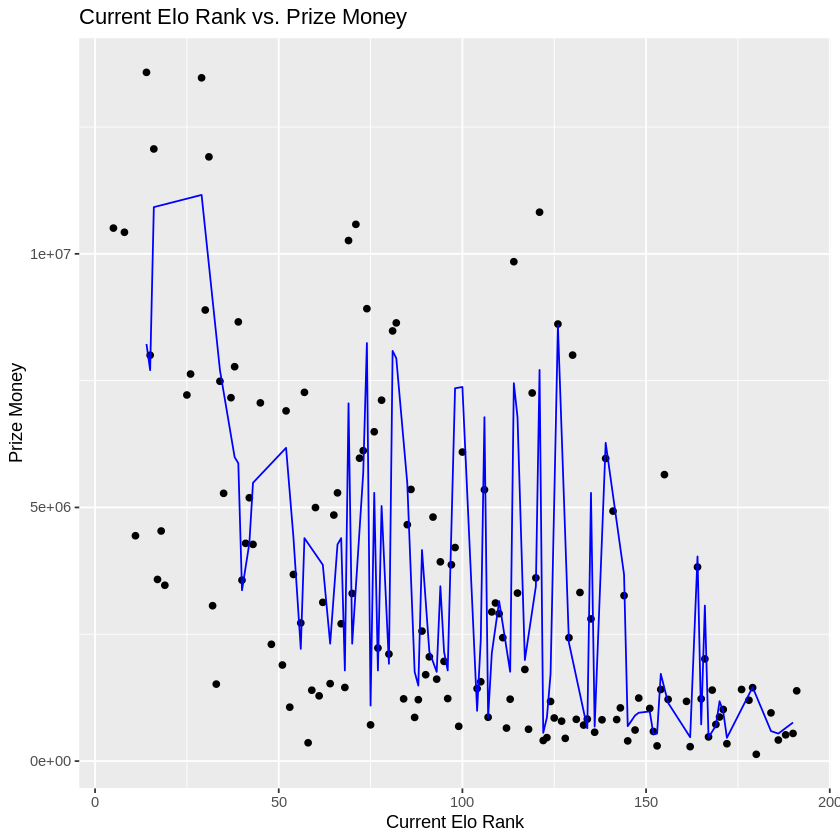

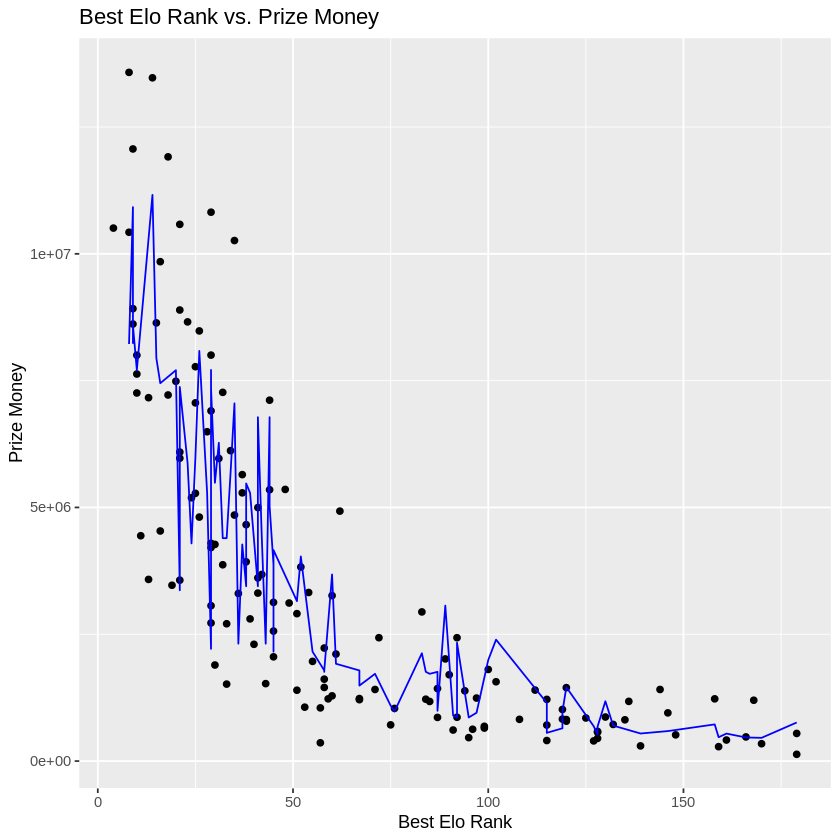

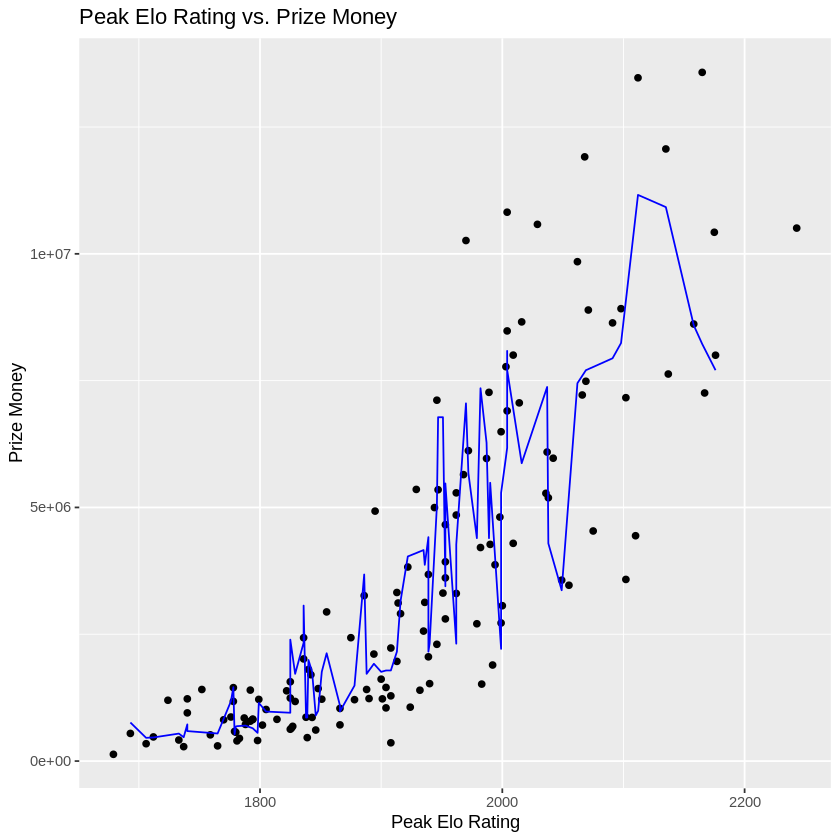

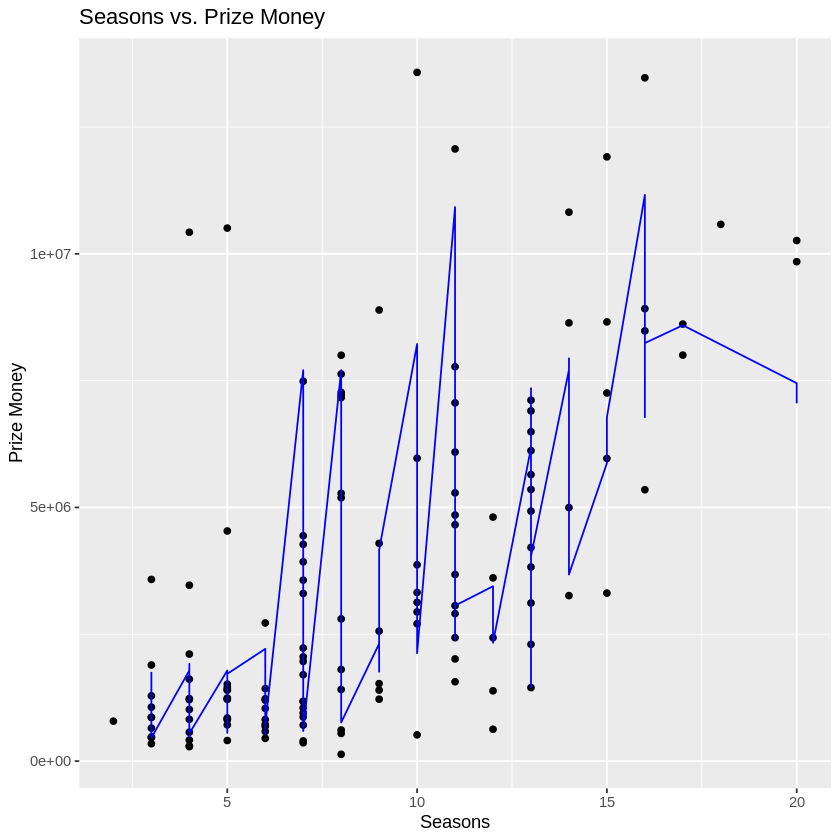

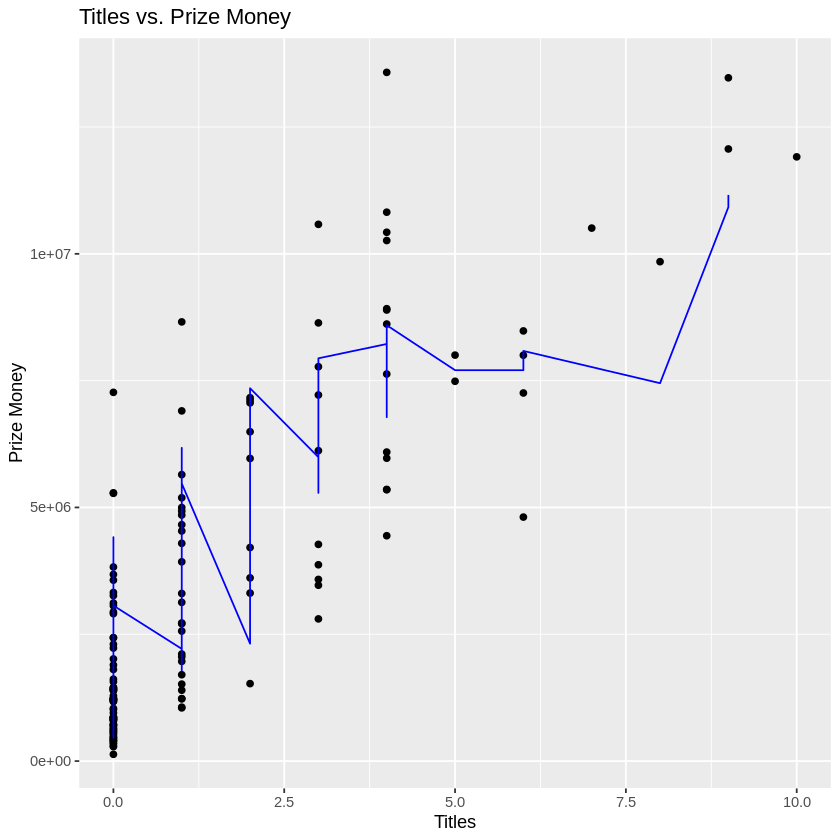

In [178]:
data_preds <- data_fit %>%
       predict(data_training) %>%
       bind_cols(data_training)
age_momeny_regression_plot <- age_momeny_plot +
       geom_line(data = data_preds, mapping = aes(x = Age, y = .pred), color = "blue")
age_momeny_regression_plot
rank_momeny_regression_plot1 <- rank_momeny_plot1 +
       geom_line(data = data_preds, mapping = aes(x = `Current Rank`, y = .pred), color = "blue")
rank_momeny_regression_plot1
rank_momeny_regression_plot2 <- rank_momeny_plot2 +
       geom_line(data = data_preds, mapping = aes(x = `Best Rank`, y = .pred), color = "blue")
rank_momeny_regression_plot2
rank_momeny_regression_plot3 <- rank_momeny_plot3 +
       geom_line(data = data_preds, mapping = aes(x = `Current Elo Rank`, y = .pred), color = "blue")
rank_momeny_regression_plot3
rank_momeny_regression_plot4 <- rank_momeny_plot4 +
       geom_line(data = data_preds, mapping = aes(x = `Best Elo Rank`, y = .pred), color = "blue")
rank_momeny_regression_plot4
rating_momeny_regression_plot <- rating_momeny_plot +
       geom_line(data = data_preds, mapping = aes(x = `Peak Elo Rating`, y = .pred), color = "blue")
rating_momeny_regression_plot
season_momeny_regression_plot <- season_momeny_plot +
       geom_line(data = data_preds, mapping = aes(x = `Seasons`, y = .pred), color = "blue")
season_momeny_regression_plot
title_momeny_regression_plot <- titles_momeny_plot +
       geom_line(data = data_preds, mapping = aes(x = `Titles`, y = .pred), color = "blue")
title_momeny_regression_plot

## Result